In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

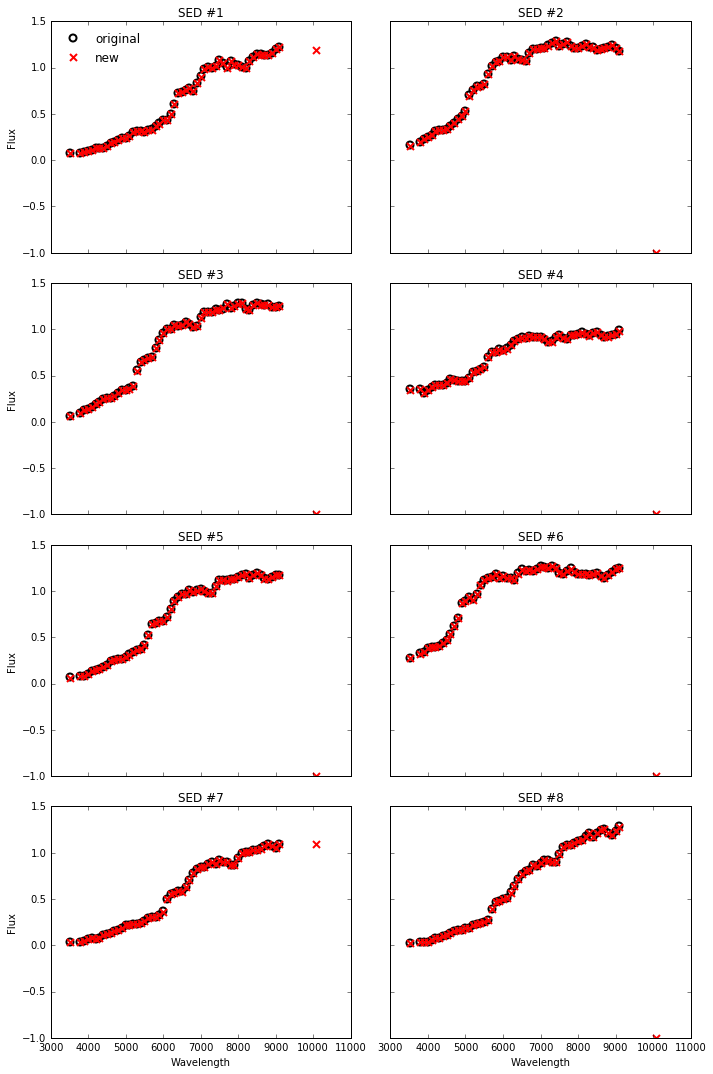

In [18]:
fig, axs = subplots(4, 2, figsize=(10, 15), sharex=True, sharey="row")

odir = os.path.expandvars("$HOME/Programs/challenge/SEDs/")

for i, ax in enumerate(axs.ravel()):
    wlo, flo = loadtxt(odir+"sed{0:02d}.txt".format(i+1), usecols=(0,1), unpack=True)

    fil = loadtxt("jpas_sed{0:02d}.txt".format(i+1), dtype=str, usecols=(0,))
    wlm = array([eval(f[f.rfind("S")+1:f.rfind("_")]) for f in fil])
    flm = loadtxt("jpas_sed{0:02d}.txt".format(i+1), usecols=(1,))
    msort = argsort(wlm)
    wlm = wlm[msort]
    flm = flm[msort]

    l1, l2, = ax.plot(wlo, flo, "ok", wlm, flm, "xr", mfc="none", mew=2, ms=7)
    ax.set_title("SED #{0}".format(i+1))
    if ax.is_first_col(): ax.set_ylabel("Flux")

axs[-1,0].set_xlabel("Wavelength")
axs[-1,1].set_xlabel("Wavelength")
axs[0, 0].legend([l1, l2], "original new".split(), loc=0, frameon=False, numpoints=1)
fig.tight_layout()